# 💜💙Classification with logistic regression💛💚

## Loading the data for working

In [3]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [57]:
train_data = pd.read_csv('titanic_train.csv')

In order to create a machine learning model, we always follow some steps.

1. Preprocessing
2. Data Analysis
  * visualizing the missing values and categorical values
3. Cleaning the data

## Data Analysis (For missing values)

Most of the time when we are working with a large data set, there is often some missing data in the data set which needs to be taken care, for that let's use a heatmap to actually see the missing data so that later on we can tackle it.

Just remember that for data analysis we need to do the following three things

* visualize
* visualize 
* visualize

We need to visualize the data in order to check the missing values and categorical data so that we can later on clean the data

<AxesSubplot:>

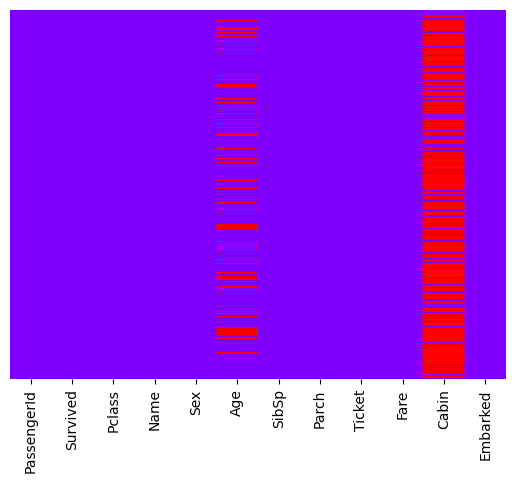

In [58]:
sns.heatmap(train_data.isnull(), yticklabels=False, cbar=False, cmap='rainbow')

From the above visualization, it is clear that there are a lot of missing values in the data set, these null or missing values must be cleaned in order for the machine learning model to work correctly.

One way to clean this data is Imputation, in which we fill all the null values with the average of other values of the same column.

Let's try the Imputation for the Age column

But for that first we need to visualize the average value of the age. Then we check other choices also like the average values of age column based on the class that each passenger has.

## Data Cleaning (For Missing Values)

As we saw above that at some percentage of age column, we have some kind of missing values, which needs to be clean, one way to clean this data is to fill it by the average age of all the passenger, this is called imputation.

and the **imputation** simply means that i can use the knowledge of some other or may be the same column to fill the missing column.

<AxesSubplot:xlabel='Age'>

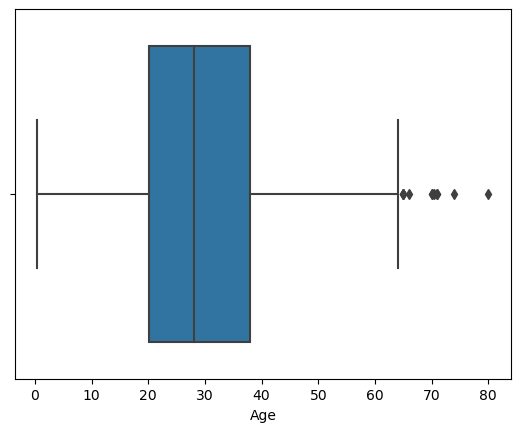

In [59]:
# checking the average of the age for filling the null values.
sns.boxplot(x='Age', data=train_data)

By watching the above box plot, we can see that we can set on average 27 value i thing for the while missing values column but don't you think that choosing one average value for such a lot of missing values is ambiguous, for that let's check out the box plot of same age column but based on the class

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

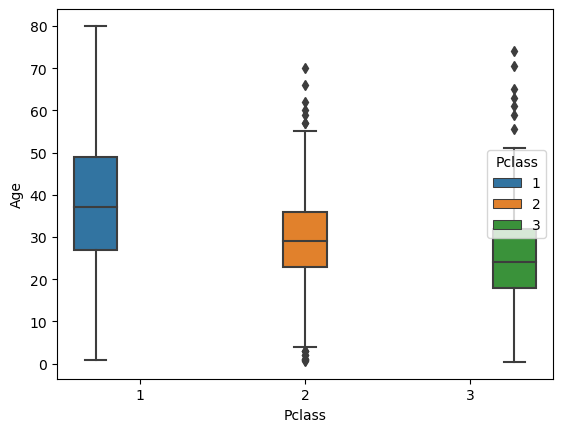

In [60]:
sns.boxplot(x='Pclass', y='Age', data=train_data, hue='Pclass')

In the above plot, we can see that not only 1 but we have three different averages for three classes, so the null value would be replaced by the one of the three averages based on the class of the passenger it is belonging.

Average Ages for three classes:
* class 1: 37
* class 2: 29
* class 3: 23


Let's create a function for that....

In [61]:
def age_imputation(age_and_pclass):
    
    '''
    returns the average value of the age for the age column based on the specific passenger class it belongs
    '''
    age = age_and_pclass[0]
    pclass = age_and_pclass[1]
    
    if pd.isna(age): # for all the columns that are null, return the average age based on the passenger class
        
        if pclass == 1:
            return 37
        elif pclass == 2:
            return 29
        else:
            return 23
    else: # for all the non-null columns, return its own age, no need to change it.
        return age

In [62]:
train_data['Age'] = train_data[['Age', 'Pclass']].apply(age_imputation, axis=1)

<AxesSubplot:>

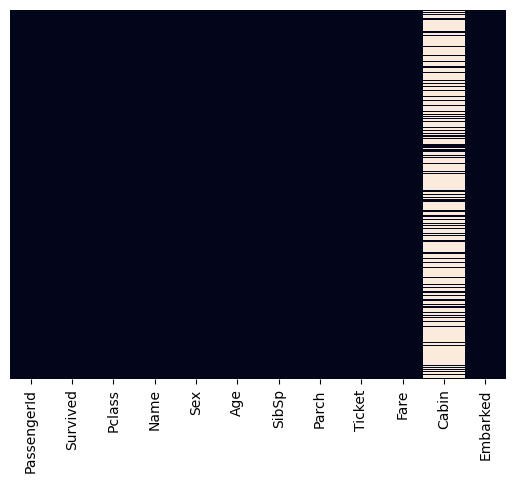

In [63]:
# Let's try to visualize the age column once again
sns.heatmap(train_data.isnull(), yticklabels=False, cbar=False)

Hurrraaaahhhhhhh...... Beautiful........

We can see clearly that we have cleaned the age column by putting the average values to all the null values based on the class each observation of the data was belonging.


Now it is the time to tackle the Cabin column, honestly there are a lot of missing values in this column, what we can do here is to simply drop all the column

In [64]:
# droping the cabin column
train_data.drop('Cabin', axis=1, inplace=True)

<AxesSubplot:>

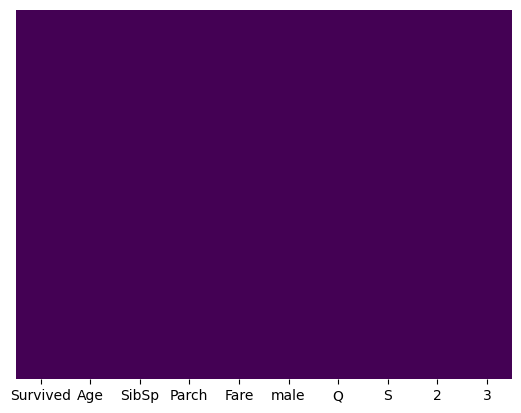

In [115]:
# let's see how our data look like 
sns.heatmap(train_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

🧡💛💚💙💚💜🤎🖤**Beautiful**🧡💛💚💙💚💜🤎🖤

Our data is now clear and clean.

## Looking the Categorical Features

In order to deal with the categorical features, what we need to do is called dummy variables.
Using dummy variables, we will convert all the categorical features into numerical encoding so that our machine learning algorithm can better understand the data in numerical form rather than in text form.

Machine learning algorithms are not able to take these categorical features directly and understand it, rather we must encode them into numerical form then we will feed it to the machine learning algorithm.

## Visualizing the data (for categorical features)

In [66]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


We can see bunch of categories that are not numerical and need to be converted or encoded into numerical form

In [67]:
# Encoding the categorical features using dummy variables.
sex = pd.get_dummies(train_data['Sex'], drop_first=True)
pclass = pd.get_dummies(train_data['Pclass'], drop_first=True)
embarked = pd.get_dummies(train_data['Embarked'], drop_first=True)

Once we have find the dummy variables of all the categorical features, it's time to concate it with the original dataset

In [68]:
train_data = pd.concat([train_data, sex, embarked, pclass], axis=1)

In [69]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


Now the main thing that we need to do is to drop all the un-necessary columns which does not gives us much information in order for training the model using this dataset

In [70]:
train_data.drop(['PassengerId', 'Pclass', 'Name', 'Sex', 'Ticket', 'Embarked'],
                   axis=1, inplace=True)

In [71]:
# let''''''''''s check the head of the data again

train_data.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


## Building a Logistic Regression Model

once the data is cleaned and encoded, it is now ready for the model to be trained on, now let's create a logistic regression model for our data.....

The first important step in creating a model will be to split this whole bunch of data into training and test data, so that we can train our model on trainig data and then evaluate it on the data that the model has never seen to check the correct behavior of the data and correct predictions.

## Splitting the data into X and y

In [104]:
X = train_data.drop('Survived', axis=1)
y = train_data['Survived']

In [105]:
X, y

(      Age  SibSp  Parch     Fare  male  Q  S  2  3
 0    22.0      1      0   7.2500     1  0  1  0  1
 1    38.0      1      0  71.2833     0  0  0  0  0
 2    26.0      0      0   7.9250     0  0  1  0  1
 3    35.0      1      0  53.1000     0  0  1  0  0
 4    35.0      0      0   8.0500     1  0  1  0  1
 ..    ...    ...    ...      ...   ... .. .. .. ..
 886  27.0      0      0  13.0000     1  0  1  1  0
 887  19.0      0      0  30.0000     0  0  1  0  0
 888  23.0      1      2  23.4500     0  0  1  0  1
 889  26.0      0      0  30.0000     1  0  0  0  0
 890  32.0      0      0   7.7500     1  1  0  0  1
 
 [891 rows x 9 columns],
 0      0
 1      1
 2      1
 3      1
 4      0
       ..
 886    0
 887    1
 888    0
 889    1
 890    0
 Name: Survived, Length: 891, dtype: int64)

## Train Test Split

In [106]:
from sklearn.model_selection import train_test_split

# spliting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

The Survived column is droped because it is not the feature, rather it is the label that we will be predicting.

## Training the model

In [110]:
from sklearn.linear_model import LogisticRegression

# creating a model
lr = LogisticRegression()

# trainig the model
lr.fit(X_train, y_train)

C:\Users\Wasim Xaman\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Wasim Xaman\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Model Prediction

Once the model has trained on the trained data, we test its predictions on the test data to check its correctness

In [111]:
y_preds = lr.predict(X_test)

C:\Users\Wasim Xaman\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


## Evaluating the model

Model evaluation is the process of using different evaluation metrics to understand a machine learning model's performance, as well as its strengths and weaknesses.

These evaluation metrics are used to see the strength or performance of the model.
some of the evaluation metrics are:

* Confusion Matrix
* Precision
* Recall
* F1-Score
* Support


**classification_report is one of the approach for model evaluation.**

In [113]:
from sklearn.metrics import classification_report

print (classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       157
           1       0.81      0.71      0.76       111

    accuracy                           0.81       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268



# 💚Enjoy Machine Learning💚